<a href="https://colab.research.google.com/github/arielwendichansky/DI_Bootcamp/blob/master/Week4/Day4/Exercise_XP/Exercises_XP_Mini_Project_1_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kaggle
from google.colab import files

files.upload()

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d osmi/mental-health-in-tech-survey

In [ ]:
! unzip 'mental-health-in-tech-survey.zip'

In [ ]:
import pandas as pd

df = pd.read_csv('survey.csv')
print(df.head())

In [6]:
# Removing unnecessary columns
df = df.drop(columns='Timestamp')
df = df.drop(columns='comments')
df.head()

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [7]:
print(df.describe())

                Age
count  1.259000e+03
mean   7.942815e+07
std    2.818299e+09
min   -1.726000e+03
25%    2.700000e+01
50%    3.100000e+01
75%    3.600000e+01
max    1.000000e+11


In [ ]:
print(df.dtypes)

In [ ]:
#Cleaning duplicated values
print(df.duplicated().sum())
df = df.drop_duplicates()
print(df.duplicated().sum())

In [ ]:
#Analyzing unique values in columns
unique_values = df.Gender.unique()
print(unique_values)
# Define a mapping dictionary to standardize the values
mapping = {
    'Female': 'Female',
    'M': 'Male',
    'Male': 'Male',
    'female': 'Female',
    'male': 'Male',
    'm': 'Male',
    'f': 'Female',
    'F': 'Female',
    'Male-ish':'Male',
    'maile': 'Male',
}

for value in unique_values:
  if value not in mapping.keys():
    mapping[value] = 'Other'

# Replaceing the values using the mapping dictionary
df['Gender'] = df['Gender'].replace(mapping)
print(df.head())


In [ ]:
#Filling missing values in the self_employed column
df['self_employed'].fillna('No', inplace=True)

# Check for missing values in a DataFrame
missing_data = df.isnull()
print(missing_data.head())

# Count missing values in each column
missing_counts = df.isnull().sum()
print(missing_counts)

#Filling missing values in the self_employed column
df['self_employed'].fillna('No', inplace=True)

In [12]:
# Identify and handle outliers in 'Age' column
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

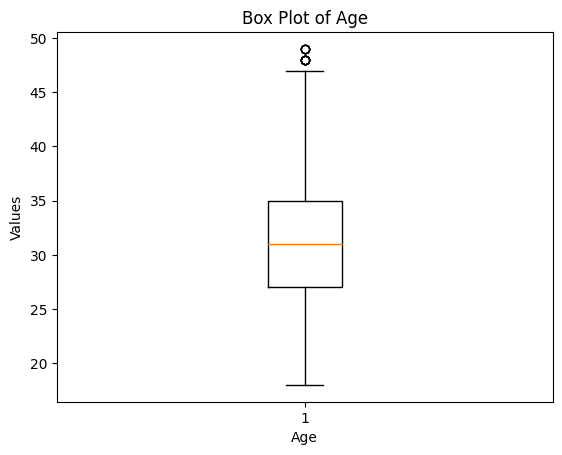

In [13]:
# Box plot for a Age column
import matplotlib.pyplot as plt

plt.boxplot(df['Age'])
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Box Plot of Age')
plt.show()

In [ ]:
df['Age_category'] = pd.cut(df['Age'],bins=[0,18,30,40,60])
grouped_df = df.groupby('Age_category')['Age'].mean().reset_index()
# Merge grouped_df with df based on 'Age_category'
df = pd.merge(df, grouped_df, on='Age_category', how='left', suffixes=('', '_mean'))

# Print the merged DataFrame
print(df.head())

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Apply one-hot encoding for mental health consequences
one_hot_encoded = pd.get_dummies(df, columns=['treatment','remote_work'])
print(one_hot_encoded.head())

In [ ]:
#Calculate correlation between values
corr_matrix = one_hot_encoded.corr()
print(corr_matrix)

What is the distribution of mental health conditions among different age groups in the tech industry?


In [17]:
#creating a new table where to see the age category and the mean from each
mean_age_by_category = df.groupby('Age_category')['Age'].mean()

# Create a DataFrame to display the results
mean_age_table = pd.DataFrame({'Mean Age': mean_age_by_category})
mean_age_table.index.name = 'Age Category'

# Display the table
print(mean_age_table)

               Mean Age
Age Category           
(0, 18]       18.000000
(18, 30]      26.249123
(30, 40]      34.657088
(40, 60]      43.612069


Text(0.5, 1.0, 'Distribution of Age')

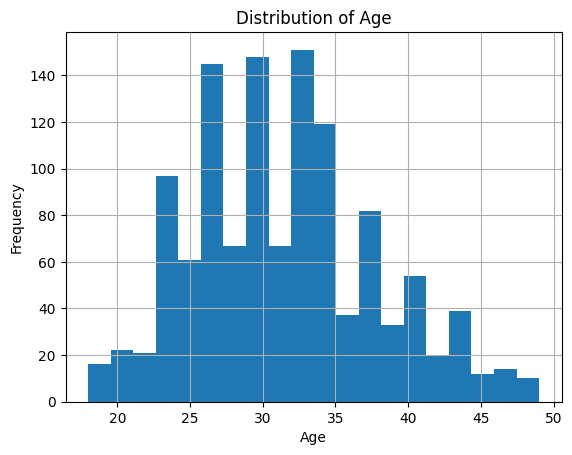

In [18]:
# draw a histogram of the age column
df['Age'].hist(bins=20)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')

In [19]:
#Grouping Age and tratment and count the occurrences of mental health issues
age_mental_health_counts = df.groupby('Age_category')['treatment'].value_counts(normalize=True)

print(age_mental_health_counts)

Age_category  treatment
(0, 18]       No           0.571429
              Yes          0.428571
(18, 30]      No           0.524561
              Yes          0.475439
(30, 40]      Yes          0.515326
              No           0.484674
(40, 60]      Yes          0.594828
              No           0.405172
Name: treatment, dtype: float64


How does the frequency of mental health issues vary by gender?

In [20]:
#Grouping gender and tratment and count the occurrences of mental health issues
gender_mental_health_counts = df.groupby('Gender')['treatment'].value_counts(normalize=True)

print(gender_mental_health_counts)

Gender  treatment
Female  Yes          0.700855
        No           0.299145
Male    No           0.549733
        Yes          0.450267
Other   Yes          0.586957
        No           0.413043
Name: treatment, dtype: float64


<Figure size 1000x600 with 0 Axes>

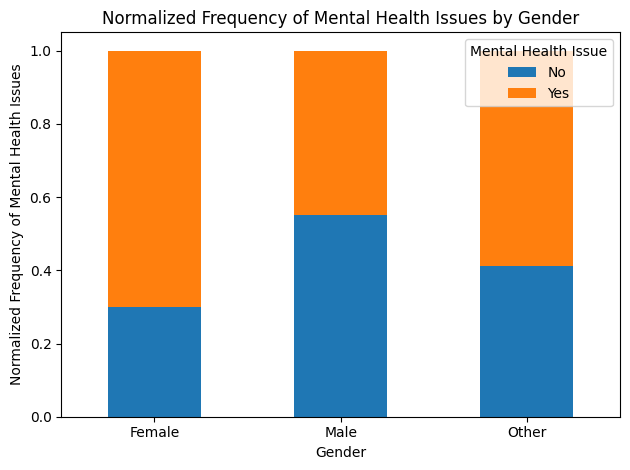

Counts of each gender category:
Male      935
Female    234
Other      46
Name: Gender, dtype: int64


In [21]:
# Plot the results
plt.figure(figsize=(10, 6))
gender_mental_health_counts.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Normalized Frequency of Mental Health Issues')
plt.title('Normalized Frequency of Mental Health Issues by Gender')
plt.legend(title='Mental Health Issue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

gender_counts = df['Gender'].value_counts()

# Print the counts
print("Counts of each gender category:")
print(gender_counts)

It can be seen that females and others in tech companies are more likely to have mental health problems rather than male

Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.


In [ ]:
answer_per_country = df['Country'].value_counts()
print(answer_per_country)
answer_per_country = answer_per_country.to_dict()


In [101]:
health_country = {}
for country,answ in answer_per_country.items():
  # 26 is the mean from all of the answers
  if answ >= 26:
    #only considering countries with more than 20 answers and calculate the mean of treatment in these
    #eq is a method that checks equality.
    mean_yes_responses = df[df['Country']== country]['treatment'].eq('Yes').mean()
    health_country[country] = mean_yes_responses
health_country_series = pd.Series(health_country)
print(health_country)

{'United States': 0.5492371705963939, 'United Kingdom': 0.4888888888888889, 'Canada': 0.5138888888888888, 'Germany': 0.4666666666666667, 'Ireland': 0.48148148148148145, 'Netherlands': 0.34615384615384615}


In [102]:
lowest_country = health_country_series.sort_values(ascending=True)
print(lowest_country)

Netherlands       0.346154
Germany           0.466667
Ireland           0.481481
United Kingdom    0.488889
Canada            0.513889
United States     0.549237
dtype: float64


The Netherlands is the country with the lowest average of people with 34% out of 26 samples

In [103]:
highest_country = health_country_series.sort_values(ascending=False)
print(highest_country)

United States     0.549237
Canada            0.513889
United Kingdom    0.488889
Ireland           0.481481
Germany           0.466667
Netherlands       0.346154
dtype: float64


On the other hand we have Australia with the highest one with 21 samples

In [ ]:
us_mental = df[df['Country']== 'United States']
print(us_mental)

In [ ]:
unique_values_us = us_mental.state.unique()
print(unique_values_us)

In [28]:
us_mental_health = us_mental.groupby('Gender')['treatment'].value_counts(normalize=True)

print(us_mental_health)

Gender  treatment
Female  Yes          0.726190
        No           0.273810
Male    No           0.507634
        Yes          0.492366
Other   Yes          0.551724
        No           0.448276
Name: treatment, dtype: float64


<Figure size 1000x600 with 0 Axes>

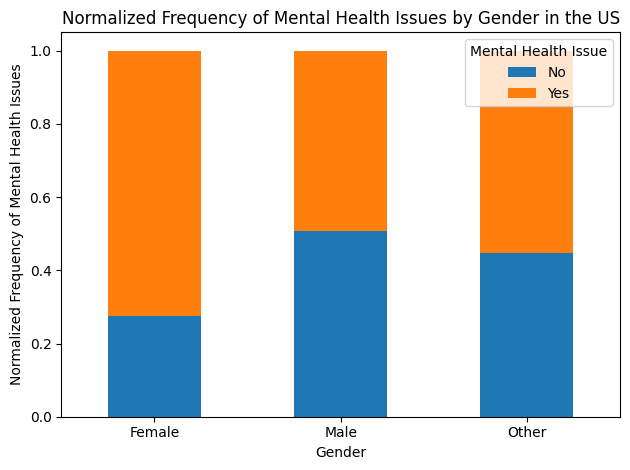

In [29]:
# Plot the results
plt.figure(figsize=(10, 6))
us_mental_health.unstack().plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Normalized Frequency of Mental Health Issues')
plt.title('Normalized Frequency of Mental Health Issues by Gender in the US')
plt.legend(title='Mental Health Issue')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

gender_counts = df['Gender'].value_counts()

In [ ]:
# Calculate the count of responses per state
answer_per_state = us_mental['state'].value_counts()

# Filter the rows where the count is higher than 16
filtered_states = answer_per_state[answer_per_state > 16]

# Filter the rows of the DataFrame where the state count is higher than 16
filtered_us_mental = us_mental[us_mental['state'].isin(filtered_states.index)]

print(filtered_us_mental)

In [110]:
# Apply one-hot encoding for tratment to measure by state
one_hot_encode_state = pd.get_dummies(filtered_us_mental, columns=['treatment'])
filtered_us_mental = one_hot_encode_state.groupby('state')['treatment_Yes','treatment_No'].mean()
# filtered_us_mental = filtered_us_mental.groupby('state').size()
print(filtered_us_mental)

       treatment_Yes  treatment_No
state                             
CA          0.620155      0.379845
IL          0.678571      0.321429
IN          0.480000      0.520000
MA          0.473684      0.526316
MI          0.454545      0.545455
MN          0.631579      0.368421
NY          0.535714      0.464286
OH          0.703704      0.296296
OR          0.615385      0.384615
PA          0.464286      0.535714
TN          0.409091      0.590909
TX          0.568182      0.431818
WA          0.585714      0.414286


<ipython-input-110-f19162e43a22>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  filtered_us_mental = one_hot_encode_state.groupby('state')['treatment_Yes','treatment_No'].mean()


In [112]:
lowest_state = filtered_us_mental['treatment_Yes'].sort_values(ascending=True)
print(lowest_state)

state
TN    0.409091
MI    0.454545
PA    0.464286
MA    0.473684
IN    0.480000
NY    0.535714
TX    0.568182
WA    0.585714
OR    0.615385
CA    0.620155
MN    0.631579
IL    0.678571
OH    0.703704
Name: treatment_Yes, dtype: float64


In [113]:
highest_state = filtered_us_mental['treatment_Yes'].sort_values(ascending=False)
print(highest_state)

state
OH    0.703704
IL    0.678571
MN    0.631579
CA    0.620155
OR    0.615385
WA    0.585714
TX    0.568182
NY    0.535714
IN    0.480000
MA    0.473684
PA    0.464286
MI    0.454545
TN    0.409091
Name: treatment_Yes, dtype: float64


Ohio is the state in the US with the highest percentage of persons who work in a hightech company and need menthal treatments. On the other hand, Tennessee is the one with the lowest percentage.